# Assignment 5(due on 12/20)

## Student:彭子豪（12332300），Gtihub：shsjpzh
## 批改人：张鹏


## 得分：39/40+13/15

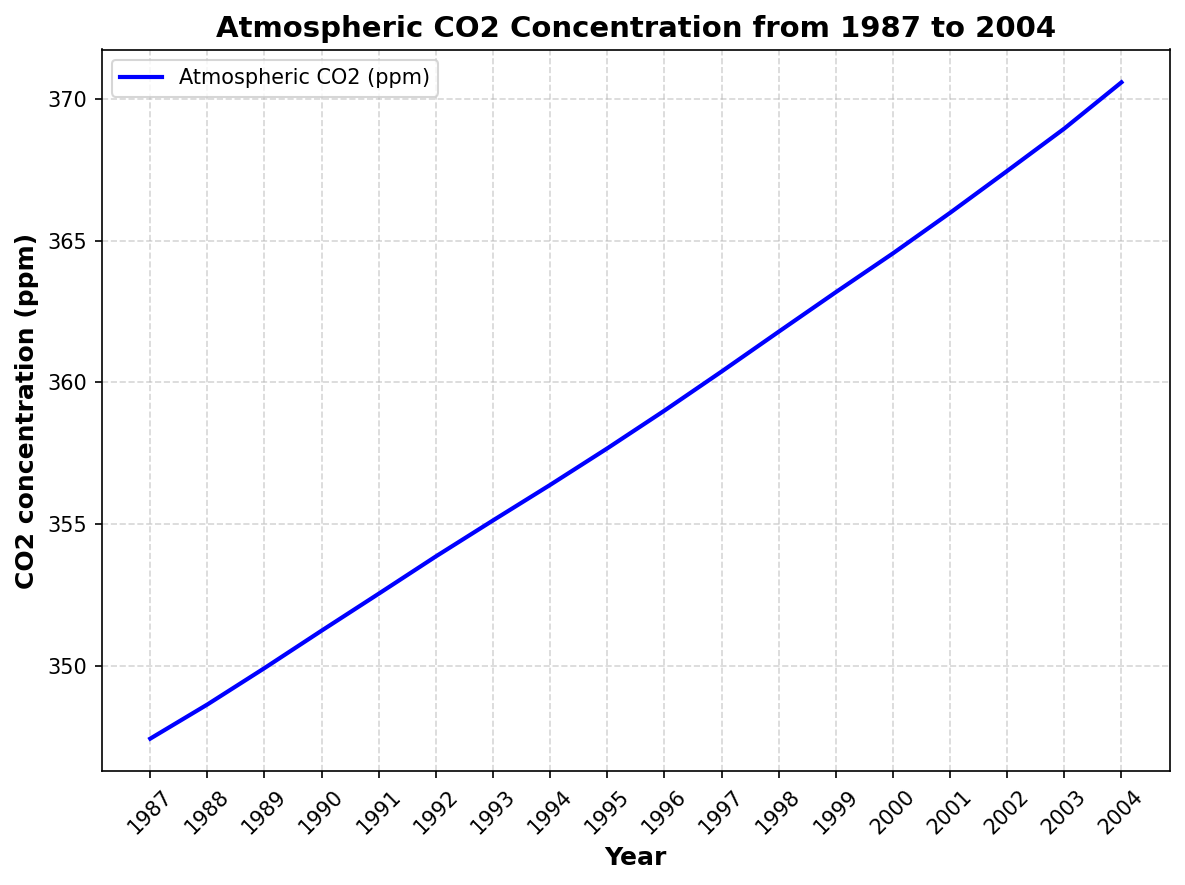

In [1]:
#1.1
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


#Load table data and select corresponding columns and years based on the specific explanations in the table
co2_emissions = pd.read_csv('global.1751_2014.csv')
co2_emissions = co2_emissions.iloc[1:] 
co2_emissions = co2_emissions[['Year','Total carbon emissions from fossil fuel consumption and cement production (million metric tons of C)'
                               ,'Carbon emissions from cement production']] 
co2_emissions['Year']=co2_emissions['Year'].apply(lambda x: int(x)) 
co2_emissions['Total carbon emissions from fossil fuel consumption and cement production (million metric tons of C)']=co2_emissions['Total carbon emissions from fossil fuel consumption and cement production (million metric tons of C)'].apply(lambda x: int(x))
co2_emissions['Carbon emissions from cement production']=co2_emissions['Carbon emissions from cement production'].apply(lambda x: int(x))
co2_emissions = co2_emissions[(co2_emissions['Year'] > 1986) & (co2_emissions['Year'] < 2005)]
co2_emissions['fossil_fuel_emissions'] = (co2_emissions['Total carbon emissions from fossil fuel consumption and cement production (million metric tons of C)'] 
                                                     - co2_emissions['Carbon emissions from cement production'])/(2.13*1000)
yearly_emissions = dict(zip(co2_emissions['Year'], co2_emissions['fossil_fuel_emissions'])) #Create an annual emissions dictionary and add a mapping through zip


# Constants for the model
k12 = 105/740  # Transfer coefficient from atmosphere to ocean
k21 = 102/900  # Transfer coefficient from ocean to atmosphere

# Initial values for 1986 in PgC
N1_initial = 740  # Carbon content in the atmosphere
N2_initial = 900  # Carbon content in the surface ocean

# Convert PgC to ppm for the atmosphere
N1_initial_ppm = N1_initial/2.13  # Conversion factor from PgC to ppm
N2_initial_ppm = N2_initial/2.13 

# Differential equations for the model
def model1(N, t, k12, k21, yearly_emissions):
    N1, N2 = N
    year = int(t)
    gamma = yearly_emissions.get(year, 0)  # Default to 0 if year is not in the dataset
    dN1dt = -k12 * N1 + k21 * N2 + gamma
    dN2dt = k12 * N1 - k21 * N2
    return [dN1dt, dN2dt]

# Solving the differential equations
years = np.arange(1987, 2005)
N0 = [N1_initial_ppm, N2_initial_ppm]
solution1 = odeint(model1, N0, years, args=(k12, k21, yearly_emissions))


# Extracting and converting N1 to ppm
N1_ppm = solution1[:, 0]


plt.figure(figsize=(8, 6), dpi=150)
plt.plot(years, N1_ppm, label="Atmospheric CO2 (ppm)", linewidth=2, color='blue')
plt.xticks(np.arange(1987, 2005, 1), rotation=45)
plt.xlabel("Year", weight='bold', fontsize=12)
plt.ylabel("CO2 concentration (ppm)", weight='bold', fontsize=12)
plt.title("Atmospheric CO2 Concentration from 1987 to 2004", weight='bold', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


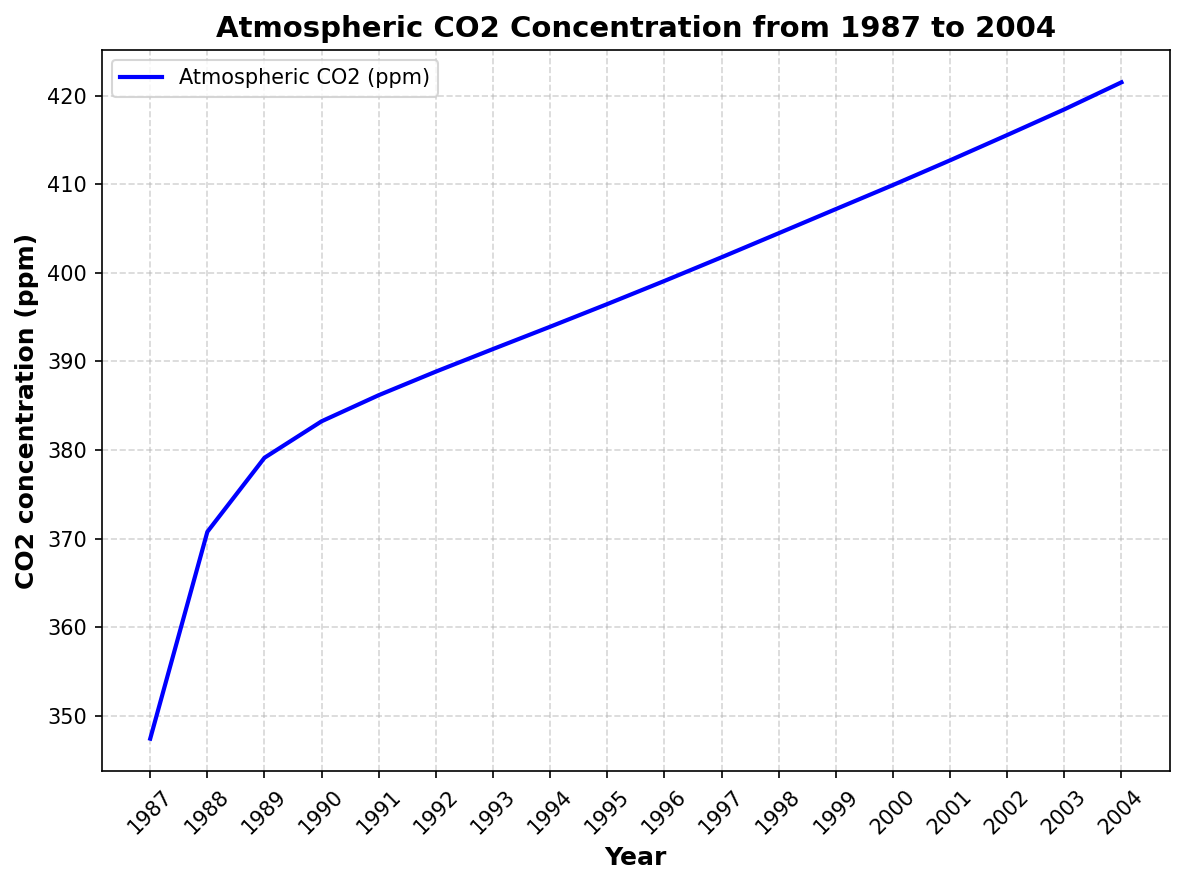

In [2]:
#1.2
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#Load table data and select corresponding columns and years based on the specific explanations in the table
co2_emissions = pd.read_csv('global.1751_2014.csv')
co2_emissions = co2_emissions.iloc[1:] 
co2_emissions = co2_emissions[['Year','Total carbon emissions from fossil fuel consumption and cement production (million metric tons of C)'
                               ,'Carbon emissions from cement production']] 
co2_emissions['Year']=co2_emissions['Year'].apply(lambda x: int(x)) 
co2_emissions['Total carbon emissions from fossil fuel consumption and cement production (million metric tons of C)']=co2_emissions['Total carbon emissions from fossil fuel consumption and cement production (million metric tons of C)'].apply(lambda x: int(x))
co2_emissions['Carbon emissions from cement production']=co2_emissions['Carbon emissions from cement production'].apply(lambda x: int(x))
co2_emissions = co2_emissions[(co2_emissions['Year'] > 1986) & (co2_emissions['Year'] < 2005)]
co2_emissions['fossil_fuel_emissions'] = (co2_emissions['Total carbon emissions from fossil fuel consumption and cement production (million metric tons of C)'] 
                                                     - co2_emissions['Carbon emissions from cement production'])/(2.13*1000)
yearly_emissions = dict(zip(co2_emissions['Year'], co2_emissions['fossil_fuel_emissions'])) #Create an annual emissions dictionary and add a mapping through zip
# Constants for the model
k12 = 105/740  # Transfer coefficient from atmosphere to ocean
k21 = 102/900  # Transfer coefficient from ocean to atmosphere


# Initial values for 1986 in PgC
N1_initial = 740  # Carbon content in the atmosphere
N2_initial = 900  # Carbon content in the surface ocean

# Convert PgC to ppm for the atmosphere
N1_initial_ppm = N1_initial/2.13  # Conversion factor from PgC to ppm
N2_initial_ppm = N2_initial/2.13 

def model2(N, t, k12, k21, yearly_emissions):
    N1, N2 = N
    year = int(t)
    gamma = yearly_emissions.get(year, 0)  # Default to 0 if year is not in the dataset
    dN1dt = -k12 * N1 + k21 * (821/2.13 + (3.69 + 1.86e-2 * N1 - 1.80e-6 * N1**2) * (N2-821/2.13)) + gamma
    dN2dt = k12 * N1 - k21 * (821/2.13 + (3.69 + 1.86e-2 * N1 - 1.80e-6 * N1**2) * (N2-821/2.13))
    return [dN1dt, dN2dt]

# Solving the differential equations
years = np.arange(1987, 2005)
N0 = [N1_initial_ppm, N2_initial_ppm]
solution2 = odeint(model2, N0, years, args=(k12, k21, yearly_emissions))


# Extracting and converting N1 to ppm
N1_ppm = solution2[:, 0]

plt.figure(figsize=(8, 6), dpi=150)
plt.plot(years, N1_ppm, label="Atmospheric CO2 (ppm)", linewidth=2, color='blue')
plt.xticks(np.arange(1987, 2005, 1), rotation=45)
plt.xlabel("Year", weight='bold', fontsize=12)
plt.ylabel("CO2 concentration (ppm)", weight='bold', fontsize=12)
plt.title("Atmospheric CO2 Concentration from 1987 to 2004", weight='bold', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()



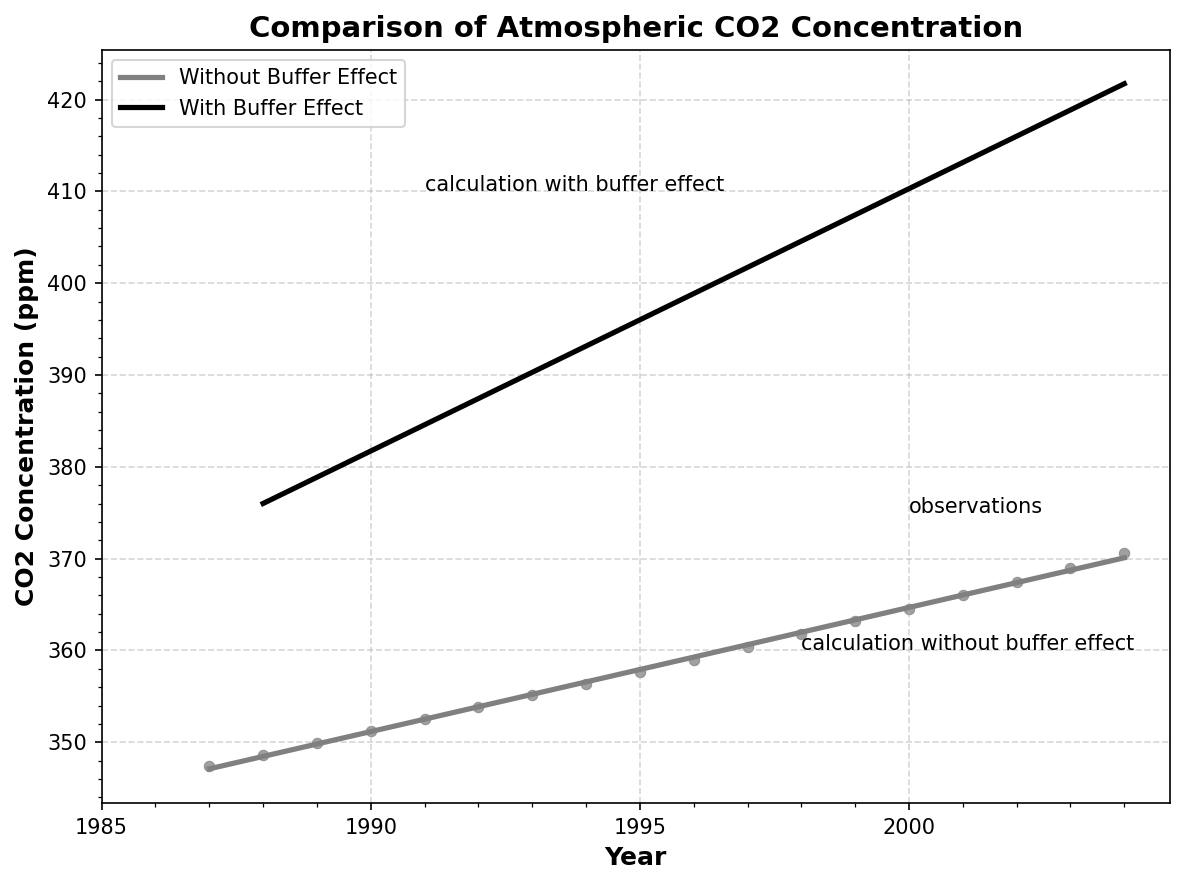

In [3]:
#1.3
# Differential equations for solving problem 1.2 (including buffering effects)
solution_no_buffer = odeint(model1, N0, years, args=(k12, k21, yearly_emissions))
solution_with_buffer = odeint(model2, N0, years, args=(k12, k21, yearly_emissions))

# Extract and convert N1 to ppm
N1_ppm_no_buffer = solution_no_buffer[:, 0]
N1_ppm_with_buffer = solution_with_buffer[:, 0]
# Fit linear regression line to the data
linear_regression_no_buffer = np.polyfit(years, N1_ppm_no_buffer, 1)
linear_regression_with_buffer = np.polyfit(years[1:], N1_ppm_with_buffer[1:], 1)

# Generate the linear regression line
linear_regression_line_no_buffer = np.polyval(linear_regression_no_buffer, years)
linear_regression_line_with_buffer = np.polyval(linear_regression_with_buffer, years[1:])

#plot the figure
plt.figure(figsize=(8, 6), dpi=150)
plt.scatter(years, N1_ppm_no_buffer, s=25, marker='o', linewidths=0.5, color='grey',alpha=0.75)
plt.plot(years, linear_regression_line_no_buffer, label="Without Buffer Effect", linewidth=2.5, color='grey')
plt.plot(years[1:], linear_regression_line_with_buffer, label="With Buffer Effect", linewidth=2.5,color = 'black')
plt.xticks(np.arange(1985, 2005, 5))
plt.xlabel("Year", weight='bold', fontsize=12)
plt.ylabel("CO2 Concentration (ppm)", weight='bold', fontsize=12)
plt.title("Comparison of Atmospheric CO2 Concentration", weight='bold', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.5)
plt.minorticks_on()  
plt.tight_layout()
plt.annotate('calculation without buffer effect', xy=(1990, 350), xytext=(1998, 360))
plt.annotate('observations', xy=(1990, 350), xytext=(2000, 375))
plt.annotate('calculation with buffer effect', xy=(1990, 345), xytext=(1991, 410))
plt.show()


### 第一问代码思路和结果正确，但是gama值未添加1986年的值
### 第二问代码思路和结果正确，但是gama值未添加1986年的值
### 第三问结果正确，报告分析完整。
### 得分38+1/40

d:\下载\python\python3.11\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


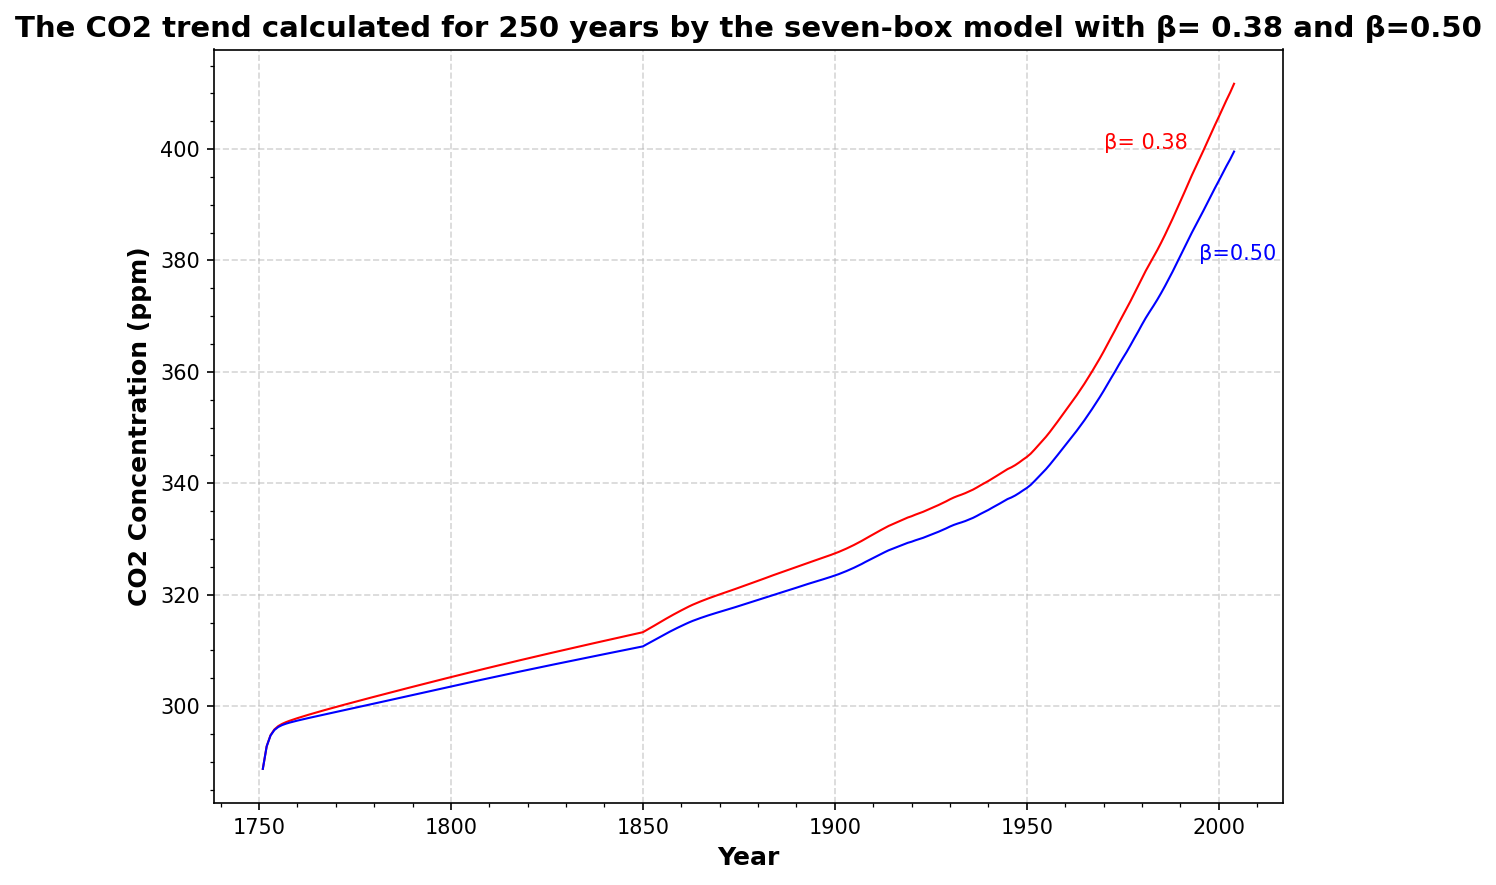

In [4]:
#bonus
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#Read corresponding data
co2_emissions = pd.read_csv('global.1751_2014.csv')
co2_emissions = co2_emissions.iloc[1:]
co2_emissions = co2_emissions[['Year','Total carbon emissions from fossil fuel consumption and cement production (million metric tons of C)','Carbon emissions from cement production',]] #根据文中对γ的描述，选择fossil fuel一列
co2_emissions['Year']=co2_emissions['Year'].apply(lambda x: int(x)) 
co2_emissions['Total carbon emissions from fossil fuel consumption and cement production (million metric tons of C)']=co2_emissions['Total carbon emissions from fossil fuel consumption and cement production (million metric tons of C)'].apply(lambda x: int(x))
co2_emissions['Carbon emissions from cement production']=co2_emissions['Carbon emissions from cement production'].apply(lambda x: int(x))
co2_emissions = co2_emissions[(co2_emissions['Year'] > 1750) & (co2_emissions['Year'] < 2005)]
co2_emissions['fossil_fuel_emissions'] = (co2_emissions['Total carbon emissions from fossil fuel consumption and cement production (million metric tons of C)'] - co2_emissions['Carbon emissions from cement production'])/(2.13*1000)
yearly_emissions = dict(zip(co2_emissions['Year'], co2_emissions['fossil_fuel_emissions'])) #Create an annual emissions dictionary and add a mapping through zip

# Load table data and select corresponding columns and years based on the specific explanations in the table
landusechange_emissions = pd.read_excel('Global_Carbon_Budget_2016_v1.0.xlsx', sheet_name='Historical Budget')
landusechange_emissions.columns = landusechange_emissions.iloc[13]
landusechange_emissions = landusechange_emissions.iloc[14:] # Skipping rows before the data starts
landusechange_emissions = landusechange_emissions[['Year', 'land-use change emissions']]
landusechange_emissions = landusechange_emissions[(landusechange_emissions['Year'] >1750) & (landusechange_emissions['Year'] <=2004)]
landusechange_emissions['land-use change emissions'] = landusechange_emissions['land-use change emissions'].fillna(0)
landusechange_emissions['land-use change emissions'] = landusechange_emissions['land-use change emissions']/2.13

land_use_change = dict(zip(landusechange_emissions['Year'], landusechange_emissions['land-use change emissions']))
landusechange_emissions.columns = landusechange_emissions.iloc[13]

# Define initial values and convert units to ppm
N1_0= 615/2.13 
N2_0 = 842/2.13 
N3_0 = 9744/2.13 
N4_0 = 26280/2.13 
N5_0 = 90000000/2.13
N6_0 = 731/2.13
N7_0 = 1328/2.13

# Define model coefficients
k12 = 60/615
k21 = 60/842 
k23 = 9/842
k24 = 43/842
k32 = 52/9744
k34 = 162/9744
k43 = 205/26280
k45 = 0.2/26280
k51 = 0.2/90000000
k67 = 62/731
k71 = 62/1328


# Define differential equations
def model1_3(N, t, k12, k21, k23, k24, k32, k34, k43, k45, k51, k67, k71, β, yearly_emissions, land_use_change):
    N1, N2, N3, N4, N5, N6, N7= N
    year = int(t)
    N20 = 821/2.13
    f0 = 62/2.13
    P0 = 290.21
    f = f0 * (1 + β * np.log(N1/P0))
    gamma = yearly_emissions.get(year, 0)
    delta = land_use_change.get(year, 0)
    dN1dt = -k12 * N1 + k21 * (N20 +(3.69 + 1.86e-2 * N1 - 1.80e-6 * N1**2) * (N2 - N20)) + gamma - f + delta + k51 * N5 + k71 * N7 
    dN2dt = k12 * N1 - k21 * (N20 +(3.69 + 1.86e-2 * N1 - 1.80e-6 * N1**2) * (N2 - N20)) - k23 * N2 + k32 * N3 - k24 * N2
    dN3dt = k23 * N2 - k32 * N3 - k34 * N3 + k43 * N4
    dN4dt = k34 * N3 - k43 * N4 + k24 * N2 - k45 * N4
    dN5dt = k45 * N4 - k51 * N5
    dN6dt = f - k67 * N6 - 2 * delta
    dN7dt = k67 * N6 - k71 * N7 + delta
    return [dN1dt, dN2dt, dN3dt, dN4dt, dN5dt, dN6dt, dN7dt]

# Solving the differential equations
years = np.arange(1751, 2005)
N0 = [N1_0, N2_0, N3_0, N4_0, N5_0, N6_0, N7_0]
β= 0.38
β1 = 0.5
solution1_3 = odeint(model1_3, N0, years, args=(k12, k21, k23, k24, k32, k34, k43, k45, k51, k67, k71, β, yearly_emissions, land_use_change))
solution1_3_1 = odeint(model1_3, N0, years, args=(k12, k21, k23, k24, k32, k34, k43, k45, k51, k67, k71, β1, yearly_emissions, land_use_change))

# Extract results
N1_PPM_1_3 = solution1_3[:, 0]
N1_PPM_1_3_1 = solution1_3_1[:, 0]


#plot the result
plt.figure(figsize=(8, 6), dpi=150)
plt.plot(years, N1_PPM_1_3, label="β=0.38", linewidth=1, color='red')
plt.plot(years, N1_PPM_1_3_1, label="β=0.50", linewidth=1, color='blue')
plt.xticks(np.arange(1750, 2001, 50))
plt.xlabel("Year", weight='bold', fontsize=12)
plt.ylabel("CO2 Concentration (ppm)", weight='bold', fontsize=12)
plt.title("The CO2 trend calculated for 250 years by the seven-box model with β= 0.38 and β=0.50", weight='bold', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.minorticks_on()  
plt.tight_layout()
plt.annotate('β= 0.38', xy=(1990, 350), xytext=(1970, 400), color ='red')
plt.annotate('β=0.50', xy=(1990, 350), xytext=(1995, 380), color ='blue')
plt.show()


## 第三问代码思路和结果基本正确报告分析完整,缺少一条观测值的曲线。
### 得分13/15